In [1]:
# import necessary stuff
import numpy as np
import tensorflow as tf
import scipy.sparse as sp
import pickle
import pandas as pd
import os.path
import h5py
import datetime
import pytz
import matplotlib.pyplot as plt

2023-11-01 05:52:22.811021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
timezone = pytz.timezone("Asia/Jakarta")
now = datetime.datetime.now(timezone).strftime("%Y-%m-%d_%H-%M-%S")
print(now)

2023-11-01_05-52-27


In [3]:
with h5py.File('MAIN_3D_data_2023-10-31_23-25-51.h5') as f:
  potential = f['potential'][:]
  energy = f['energy'][:]
  Z = f['Z'][:]
  kinetic = f['kinetic'][:]

In [4]:
X_train = potential.reshape(12000, 32, 32, 32, 1)
y_train = kinetic.ravel()

In [5]:
L = 32
model = tf.keras.Sequential([
    tf.keras.layers.Conv3D(64, (3,3,3), strides=2, padding="same", activation="relu", input_shape=(L, L, L, 1)),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv3D(64, (3,3,3), strides=2, padding="same", activation="relu"),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv3D(64, (3,3,3), strides=2, padding="same", activation="relu"),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    tf.keras.layers.Conv3D(32, (4,4,4), strides=1, padding="same", activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="linear")
])

# model.summary()

2023-11-01 05:52:37.525686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 05:52:37.546135: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 05:52:37.546262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mae")

In [7]:
my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=50, restore_best_weights=True),
    tf.keras.callbacks.CSVLogger(f"monitor_{now}.csv", append=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.1, verbose=1, patience=20)
]

history = model.fit(X_train, y_train, epochs=300, batch_size=200, verbose=1, callbacks=my_callbacks)

Epoch 1/300


2023-11-01 05:52:42.243207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8900
2023-11-01 05:52:44.073754: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-01 05:52:44.075295: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbafb511f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 05:52:44.075306: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-11-01 05:52:44.078628: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 05:52:44.157068: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

60/60 [==============================] - 15s 107ms/step - loss: 3.1216 - lr: 0.0010
Epoch 2/300
60/60 [==============================] - 6s 107ms/step - loss: 0.5679 - lr: 0.0010
Epoch 3/300
60/60 [==============================] - 6s 106ms/step - loss: 0.1277 - lr: 0.0010
Epoch 4/300
60/60 [==============================] - 6s 106ms/step - loss: 0.1981 - lr: 0.0010
Epoch 5/300
60/60 [==============================] - 6s 107ms/step - loss: 0.4668 - lr: 0.0010
Epoch 6/300
60/60 [==============================] - 6s 107ms/step - loss: 0.2194 - lr: 0.0010
Epoch 7/300
60/60 [==============================] - 6s 107ms/step - loss: 0.0869 - lr: 0.0010
Epoch 8/300
60/60 [==============================] - 6s 107ms/step - loss: 0.1095 - lr: 0.0010
Epoch 9/300
60/60 [==============================] - 6s 107ms/step - loss: 0.0852 - lr: 0.0010
Epoch 10/300
60/60 [==============================] - 6s 108ms/step - loss: 0.1358 - lr: 0.0010
Epoch 11/300
60/60 [==============================] - 6s 108

In [8]:
with h5py.File('MAIN_3D_data_2023-11-01_01-04-15.h5') as f:
  potential_test = f['potential'][:]
  energy_test = f['energy'][:]
  Z_test = f['Z'][:]
  kinetic_test = f['kinetic'][:]

In [9]:
model.evaluate(potential_test.reshape(4000, 32, 32, 32, 1), kinetic_test.ravel())

125/125 [==============================] - 3s 17ms/step - loss: 0.0038


0.0038381232880055904

In [14]:
KNN_time =  round(0.002076562245686849, 4)
RF_time =  round(25.87881801525752, 2)
XGB_time =  round(11.287289758523306, 2)
DNN_time = round(32.47, 2)

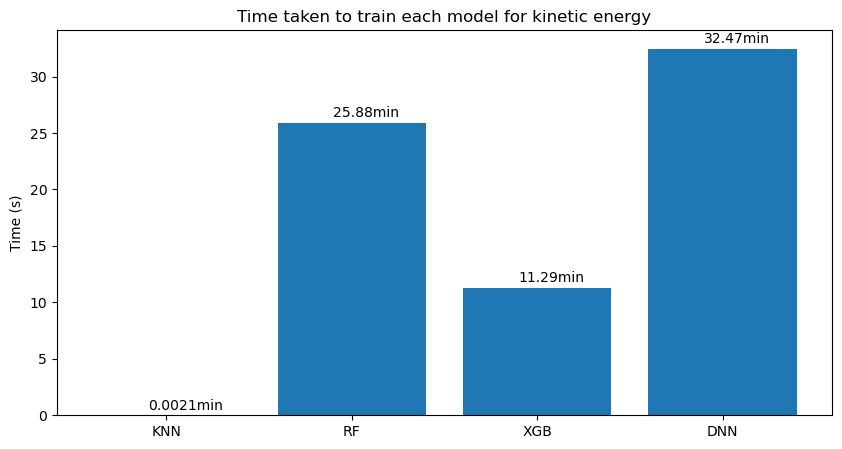

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(["KNN", "RF", "XGB", "DNN"], [KNN_time, RF_time, XGB_time, DNN_time])
plt.ylabel("Time (s)")
plt.title("Time taken to train each model for kinetic energy")
# annotate bar plot
plt.annotate(f"{KNN_time}min", (-0.1, KNN_time + 0.5))
plt.annotate(f"{RF_time}min", (0.9, RF_time + 0.5))
plt.annotate(f"{XGB_time}min", (1.9, XGB_time + 0.5))
plt.annotate(f"{DNN_time}min", (2.9, DNN_time + 0.5))
# different color for each model
# plt.grid(axis= "y")
# plt.savefig("time.png", dpi=300)
plt.show()

In [23]:
KNN_test_time = round(0.17166006565093994*60, 2)
RF_test_time = round(0.0022661407788594564*60, 2)
XGB_test_time = round(0.0026274681091308593*60, 2)
DNN_test_time = round(2.91, 2)

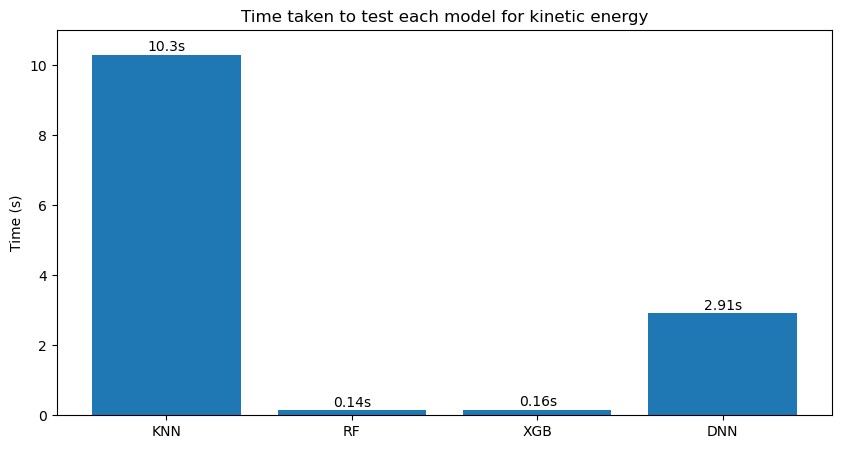

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(["KNN", "RF", "XGB", "DNN"], [KNN_test_time, RF_test_time, XGB_test_time, DNN_test_time])
plt.ylabel("Time (s)")
plt.title("Time taken to test each model for kinetic energy")
# annotate bar plot
plt.annotate(f"{KNN_test_time}s", (-0.1, KNN_test_time + 0.1))
plt.annotate(f"{RF_test_time}s", (0.9, RF_test_time + 0.1))
plt.annotate(f"{XGB_test_time}s", (1.9, XGB_test_time + 0.1))
plt.annotate(f"{DNN_test_time}s", (2.9, DNN_test_time + 0.1))
plt.ylim(top = 11)
# different color for each model
# plt.grid(axis= "y")
# plt.savefig("time.png", dpi=300)
plt.show()

In [29]:
MAE_KNN = 8.0
MAE_RF = 14.69
MAE_XGB = 9.5
MAE_DNN = round(0.0038381232880055904*1000, 2)

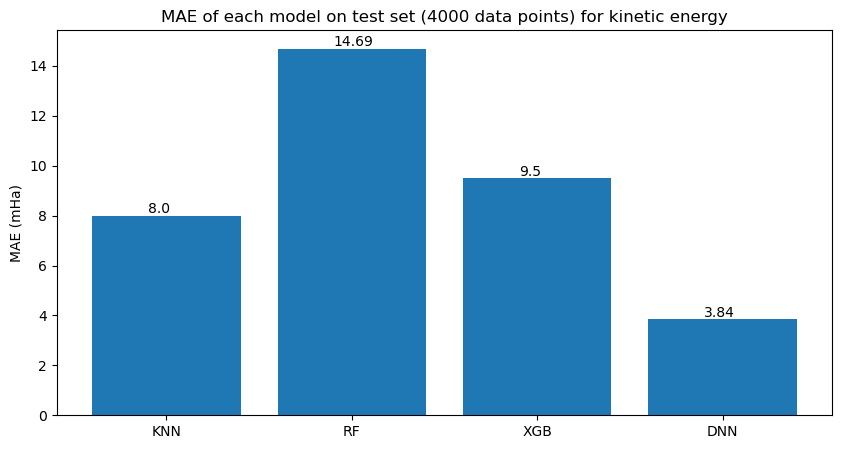

In [31]:
plt.figure(figsize=(10, 5))
plt.bar(["KNN", "RF", "XGB", "DNN"], [MAE_KNN, MAE_RF, MAE_XGB, MAE_DNN])
plt.ylabel("MAE (mHa)")
plt.title("MAE of each model on test set (4000 data points) for kinetic energy")
# annotate bar plot
plt.annotate(f"{MAE_KNN}", (-0.1, MAE_KNN + 0.1))
plt.annotate(f"{MAE_RF}", (0.9, MAE_RF + 0.1))
plt.annotate(f"{MAE_XGB}", (1.9, MAE_XGB + 0.1))
plt.annotate(f"{MAE_DNN}", (2.9, MAE_DNN + 0.1))
# plt.ylim(top=6)
# different color for each model
# plt.grid(axis= "y")
# plt.savefig("time.png", dpi=300)
plt.show()

In [32]:
Z_test_hydrogen = np.asarray(Z_test.flatten()==1).nonzero()[0]
Z_test_helium = np.asarray(Z_test.flatten()==2).nonzero()[0]
Z_test_lithium = np.asarray(Z_test.flatten()==3).nonzero()[0]
Z_test_beryllium = np.asarray(Z_test.flatten()==4).nonzero()[0]

In [36]:
error_hydrogen = model.evaluate(potential_test[Z_test_hydrogen].reshape(-1, 32, 32, 32, 1), kinetic_test[Z_test_hydrogen].ravel())
error_helium = model.evaluate(potential_test[Z_test_helium].reshape(-1, 32, 32, 32, 1), kinetic_test[Z_test_helium].ravel())
error_lithium = model.evaluate(potential_test[Z_test_lithium].reshape(-1, 32, 32, 32, 1), kinetic_test[Z_test_lithium].ravel())
error_beryllium = model.evaluate(potential_test[Z_test_beryllium].reshape(-1, 32, 32, 32, 1), kinetic_test[Z_test_beryllium].ravel())

32/32 [==============================] - 0s 5ms/step - loss: 0.0077


In [37]:
print('MAE for hydrogen: ', 1000*error_hydrogen)
print('MAE for helium: ', 1000*error_helium)
print('MAE for lithium: ', 1000*error_lithium)
print('MAE for beryllium: ', 1000*error_beryllium)


MAE for hydrogen:  1.0951962321996689
MAE for helium:  2.144636120647192
MAE for lithium:  4.363411571830511
MAE for beryllium:  7.749216165393591


In [38]:
MAE_KNN_hydrogen = 1.05
MAE_KNN_helium = 4.1000000000000005
MAE_KNN_lithium = 9.889999999999999
MAE_KNN_beryllium = 16.95
MAE_RF_hydrogen = 1.8699999999999999
MAE_RF_helium = 8.319999999999999
MAE_RF_lithium = 16.47
MAE_RF_beryllium = 32.11
MAE_XGB_hydrogen = 1.1900000000000002
MAE_XGB_helium = 3.93
MAE_XGB_lithium = 16.75
MAE_XGB_beryllium = 16.119999999999997

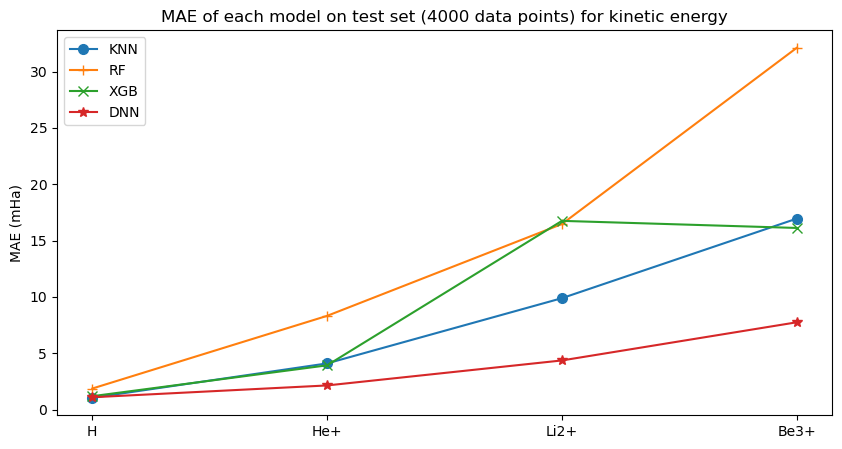

In [40]:
# scatter plot hydrogen helium lithium beryllium
plt.figure(figsize=(10, 5))
# make xtick as hydrogen helium lithium beryllium
plt.plot(['H', 'He+', 'Li2+', 'Be3+'], [MAE_KNN_hydrogen, MAE_KNN_helium, MAE_KNN_lithium, MAE_KNN_beryllium], label="KNN", marker="o", markersize=7)
plt.plot(['H', 'He+', 'Li2+', 'Be3+'], [MAE_RF_hydrogen, MAE_RF_helium, MAE_RF_lithium, MAE_RF_beryllium], label="RF", marker="+", markersize=7)
plt.plot(['H', 'He+', 'Li2+', 'Be3+'], [MAE_XGB_hydrogen, MAE_XGB_helium, MAE_XGB_lithium, MAE_XGB_beryllium], label="XGB", marker="x", markersize=7)
plt.plot(['H', 'He+', 'Li2+', 'Be3+'], [1000*error_hydrogen, 1000*error_helium, 1000*error_lithium, 1000*error_beryllium], label="DNN", marker="*", markersize=7)

plt.ylabel("MAE (mHa)")
plt.title("MAE of each model on test set (4000 data points) for kinetic energy")
plt.legend()
# annotate bar plot
plt.show()

In [59]:
model.save(f"model_{now}.h5")

/clusterfs/students/achmadjae/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
!neofetch

       _,met$$$$$gg.
    ,g$$$$$$$$$$$$$$$P.
  ,g$$P"     """Y$$.".
 ,$$P'              `$$$.
',$$P       ,ggs.     `$$b:
`d$$'     ,$P"'   .    $$$
 $$P      d$'     ,    $$P
 $$:      $$.   -    ,d$$'
 $$;      Y$b._   _,d$P'
 Y$$.    `.`"Y$$$$P"'
 `$$b      "-.__
  `Y$$
   `Y$$.
     `$$b.
       `Y$$b.
          `"Y$b._
              `"""
achmadjae@quasi08 
----------------- 
OS: Debian GNU/Linux 12 (bookworm) x86_64 
Host: 30GKS01V00 ThinkStation P358 Tower 
Kernel: 6.1.0-12-amd64 
Uptime: 40 days, 23 hours, 5 mins 
Packages: 3971 (dpkg) 
Shell: bash 5.2.15 
Terminal: node 
CPU: AMD Ryzen 9 PRO 5945 (24) @ 3.000GHz 
GPU: NVIDIA GeForce RTX 3080 Lite Hash Rate 
Memory: 24766MiB / 128693MiB 

                        
                        



